### Exercise:

Extract the date of the worst aviation disaster from: https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

Prerequisites: pandas, pd.read_html

In [3]:
import pandas as pd
w = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll')
w

[    Deaths              Date  \
 0       28  14 February 2004   
 1       15      27 June 2015   
 2        8       11 May 1984   
 3        7       9 June 1979   
 4        7    14 August 1981   
 5        6    13 August 1944   
 6        6      29 June 2010   
 7        5       30 May 1972   
 8        5      23 June 2017   
 9        4      24 July 1930   
 10       4   25 October 2016   
 11       3      14 June 1986   
 12       3      26 July 1978   
 
                                            Attraction  \
 0   Transvaal Park (entire facility affected); the...   
 1   Formosa Fun Coast music stage; a dust explosio...   
 2   Haunted Castle; a fire caused by a cigarette l...   
 3   Ghost Train; a fire at the park's ghost train ...   
 4   Skylab; a crane collided with the Skylab carou...   
 5   Virginia Reel; a fire at the facility; 125 inj...   
 6   Eco-Adventure Valley Space Journey; a malfunct...   
 7   Big Dipper; the roller coaster broke free from...   
 8   Kuzuluk A

In [8]:
w[1].head(1)['Date']

0    27 March 1977
Name: Date, dtype: object

### Exercise: 

Assuming the list is exhaustive, calculate how many people died in accidental explosions per decade in the XX century. Plot it.

Data: 
https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll

Prerequisites: pandas, pd.read_html, pd.to_datetime, matplotlib or seaborn

In [90]:
import pandas as pd
import matplotlib as plt

#get table
w = pd.read_html('https://en.wikipedia.org/wiki/List_of_accidents_and_disasters_by_death_toll')
w2 = w[4]

#data type of Date and clean characters from Deaths to be a clean number
w2['Date']=w2['Date'].str[-4:].astype(int)
w2['Deaths']= pd.to_numeric(w2.Deaths.str.replace('[^0-9]', ''))

#filter dates of XX century
w2 = w2[(w2['Date'] > 1899) & (w2['Date'] < 2000)]

#create Decade column
w2['Decade'] = (w2['Date']//10)*10

#groupby Decade and sum
w2 = w2.groupby('Decade').sum().reset_index()[['Decade', 'Deaths']]
w2

/home/angelrps/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,Decade,Deaths
0,1900,1247
1,1910,6109
2,1920,2866
3,1930,1001
4,1940,11366
5,1950,1750
6,1960,477
7,1970,850
8,1980,2971
9,1990,2871


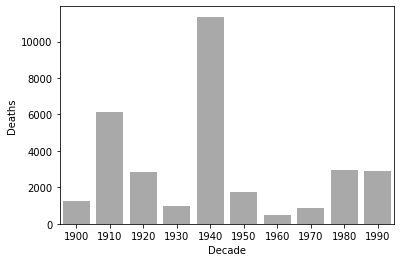

In [96]:
import seaborn as sns
sns.barplot(data=w2, x='Decade', y='Deaths',color='darkgrey')

### Exercise: 

create a function that, given the two tables extracted from http://en.wikipedia.org/wiki/List_of_S%26P_500_companies and a date, returns the list of companies in the S&P 500 at that date.